In [18]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv'

df = pd.read_csv(url, na_values=[np.nan, 'None', -999, 'NaN', ''])

df['PClass'].value_counts()


3rd    711
1st    322
2nd    279
*        1
Name: PClass, dtype: int64

In [23]:
import PyPDF2 

from PyPDF2 import PdfReader

pdf = open("./A Trip to Madrid.pdf","rb")
pdf_reader = PdfReader(pdf)
page = pdf_reader.pages[1]
print(page.extract_text())


Accommodation Details: Option 1
Mercure Madrid Plaza de Espana
The hotel is located 547 yards (500 m) from the Plaza de España. Its 97
rooms offer comfortable bed...
Delfos Hostal
Looking for a reasonably priced guesthouse in the city centre? Then, the
Delfos Hostal is the right ...
Matamu Villa
This is Matamu Villa Presidential Suite...


In [30]:
import requests
import json

r = requests.get("https://quotes.rest/qod.json")
response = r.json()
print(response['contents']['quotes'][0])

{'quote': 'A man who has no imagination has no wings.', 'length': '42', 'author': 'Mohamad Ali', 'tags': ['imagination', 'inspire'], 'category': 'inspire', 'language': 'en', 'date': '2023-01-10', 'permalink': 'https://theysaidso.com/quote/mohamad-ali-a-man-who-has-no-imagination-has-no-wings', 'id': 'dl_4NxcXFZp1k_zw541sVgeF', 'background': 'https://theysaidso.com/img/qod/qod-inspire.jpg', 'title': 'Inspiring Quote of the day'}


In [8]:
import re
import requests

# url
url = 'https://www.gutenberg.org/files/2638/2638-0.txt'

def getBook(url):
    data = requests.get(url).text
    return data


myBook = getBook(url)
print(myBook)





ï»¿The Project Gutenberg eBook of The Idiot, by Fyodor Dostoyevsky

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: The Idiot

Author: Fyodor Dostoyevsky

Translator: Eva Martin

Release Date: May, 2001 [eBook #2638]
[Most recently updated: June 21, 2021]

Language: English

Character set encoding: UTF-8

Produced by: Martin Adamson, David Widger, with corrections by Andrew Sly

*** START OF THE PROJECT GUTENBERG EBOOK THE IDIOT ***




The Idiot

by Fyodor Dostoyevsky

Translated by Eva Martin


Contents

 PART I
 PART II
 PART III
 PART IV




PART I


I.

Towards the end of November, dur

In [35]:
from bs4 import BeautifulSoup
import requests
import re
import pickle
import pandas as pd
from pandas import Series, DataFrame
from ipywidgets import FloatProgress
from time import sleep
from IPython.display import display

# url
url = 'http://www.imdb.com/chart/top?ref_=nv_mv_250_6'

result = requests.get(url)
result_content = result.content

soup = BeautifulSoup((result_content))

summary = soup.find('div', {'class': 'article'})


# Empty Lists
moviename = []
cast = []
description = []
rating = []
ratingoutof = []
year = []
genre = []
movielength = []
rot_audscore = []
rot_avgrating = []
rot_users = []


rgx = re.compile('[%s]' % '()')
f = FloatProgress(min=0, max=250)
display(f)

for row,i in zip(summary.find('table').findAll('tr'),range(len(summary.find('table').findAll('tr')))):
    for sitem in row.findAll('span',{'class':'secondaryInfo'}):
        s = sitem.find(text=True)
        year.append(rgx.sub('', s))
    for ritem in row.findAll('td',{'class':'ratingColumnimdbRating'}):
        for iget in ritem.findAll('strong'):
            rating.append(iget.find(text=True))
            ratingoutof.append(iget.get('title').split(' ', 4)[3])
    for item in row.findAll('td',{'class':'titleColumn'}):
        for href in item.findAll('a',href=True):
            moviename.append(href.find(text=True))
            rurl = 'https://www.rottentomatoes.com/m/'+ href.find(text=True)
            try:
                rresult = requests.get(rurl)
            except requests.exceptions.ConnectionError:
                status_code = "Connection refused"
            rc = rresult.content
            rsoup = BeautifulSoup(rc)
            try:
                rot_audscore.append(rsoup.find('div',
                {'class':'meter-value'}).find('span',
                {'class':'superPageFontColor'}).text)
                rot_avgrating.append(rsoup.find('div',{'class':'audience-info hidden-xs superPageFontColor'}).find('div').contents[2].strip())
                rot_users.append(rsoup.find('div',{'class':'audience-info hidden-xs superPageFontColor'}).contents[3].contents[2].
                strip())
            except AttributeError:
                rot_audscore.append("")
                rot_avgrating.append("")
                rot_users.append("")
            cast.append(href.get('title'))
            imdb = "http://www.imdb.com" + href.get('href')
            try:
                iresult = requests.get(imdb)
                ic = iresult.content
                isoup = BeautifulSoup(ic)
                description.append("")
                genre.append("")
                movielength.append("")
                # description.append(isoup.find('div',{'class':'summary_text'}).find(text=True).strip())
                # genre.append(isoup.find('span',{'class':'itemprop'}).find(text=True))
                # movielength.append(isoup.find('time',{'itemprop':'duration'}).find(text=True).strip())
            except requests.exceptions.ConnectionError:
                description.append("")
                genre.append("")
                movielength.append("")

sleep(.1)
f.value = i



 

FloatProgress(value=0.0, max=250.0)

KeyboardInterrupt: 

In [49]:
text=[
    'This is introduction to NLP',
    'It is likely to be useful,to people ',
    'Machine learning is the new electrcity',
    'There would be less hype around AI and more action going forward',
    'python is the best tool!',
    'R is good langauage',
    'I like this book',
    'I want more books like this'
    ]
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

df = pd.DataFrame({'tweet': text})
df['tweet'] =df['tweet'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df['tweet'] =df['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
df['tweet'] = df['tweet'].str.replace('[^\w\s]',"")
df['tweet']




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\devop\AppData\Local\Temp\ipykernel_8000\1446503620.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('[^\w\s]',"")


0                                  introduction nlp
1                            likely usefulto people
2                   machine learning new electrcity
3    would less hype around ai action going forward
4                                  python best tool
5                                  r good langauage
6                                         like book
7                                   want books like
Name: tweet, dtype: object

In [56]:
lookup_dict ={
    'nlp' : 'natural language processing',
    'ur' : 'your',
    'wbu' : 'what about you'
}

import re

def text_std(input_text):
   words = input_text.split()
   new_words = []
   for word in words:
    word = re.sub(r'[^\w\s]',"",word)
    if word.lower() in lookup_dict:
        word = lookup_dict[word.lower()]
        new_words.append(word)
   return new_words

user_input = input('Enter a word')

text_std(user_input)



['natural language processing', 'your', 'what about you']

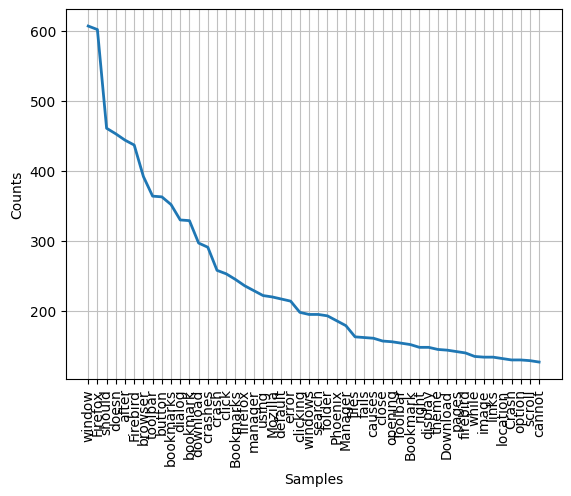

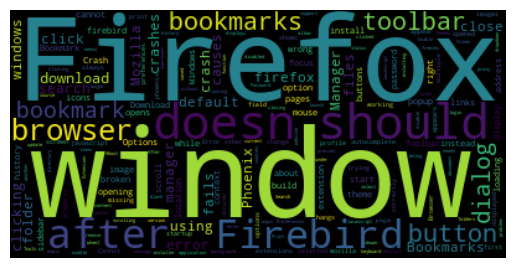

In [71]:
import nltk


from nltk.corpus import webtext
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wt_words = webtext.words('firefox.txt')

frequency_dist = nltk.FreqDist(wt_words)

large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k) > 4])

frequency_dist = nltk.FreqDist(large_words)

frequency_dist.plot(50,cumulative=False)

wcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()




In [82]:
# user_input = input('Please enter your text to proceed')

user_input = "How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management.#Best advice for #family #financial #success (@PrepareToWin)"


def textProcessingPipeline(user_string):
    import re
    import nltk
    from textblob import TextBlob
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from textblob import Word
    from nltk.util import ngrams
    import re
    from wordcloud import WordCloud, STOPWORDS
    from nltk.tokenize import word_tokenize


    user_text = user_string
    user_text.lower()

    user_text = re.sub(r'(\\u[0-9A-Fa-f]+)',r"", user_text)
    user_text = re.sub(r'[^\x00-\x7f]',r"",user_text)
    user_text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',user_text)
    user_text = re.sub('@[^\s]+','AT_USER',user_text)


    user_string = user_text
    return user_string


textProcessingPipeline(user_input)



'How to take control of your #debt URL advice for #family #financial #success (AT_USER'